Búsqueda local
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Definición del problema

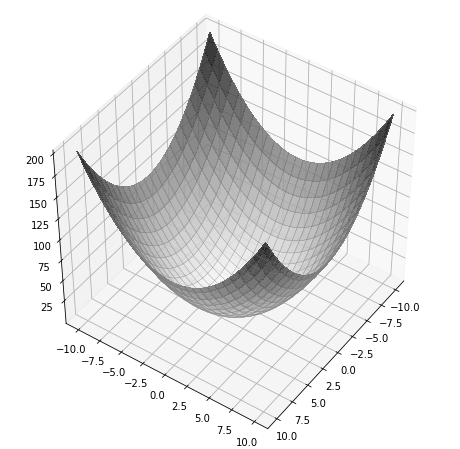

In [2]:
from plots import plot_contour, plot_surface
from testfunctions import sphere as fn

#
# Se desea encontrar el punto de mínima de la función
# esferica de dos dimensiones. El punto de mínima es
# f(0, 0) = 0. La región de busqueda es
#
#    -10 < x, y < 10
#
plot_surface(
    fn,
    x_bounds=[(-10, 10)] * 2,
)

## Búsqueda Local

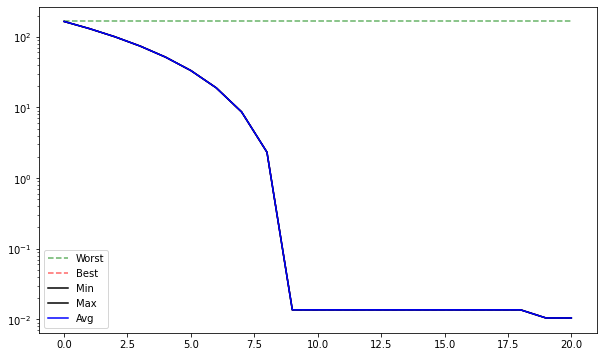

In [3]:
from fnevaluator import FnEvaluator
from generators import RandomUniform
from stats import Statistics

#
# Genera una población de una sola solución
#
monte_carlo = RandomUniform(
    pop_size=1,
    low=[-10, -10],
    high=[10, 10],
    seed=123456,
)
solutions = monte_carlo()


#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
evaluator = FnEvaluator(fn)

#
# Se instancia un objeto para computar las estadísticas de
# la corrida
#
stats = Statistics()

#
#  Optimizador
#
from localsearch import LocalSearch

optimizer = LocalSearch(
    fn=fn,
    delta0=0.5,
    reduction_factor=0.9,
)

#
# Algoritm
#
solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [4]:
stats.x_opt, stats.fn_opt

(array([-0.05109157, -0.08865545]), 0.01047013787629747)

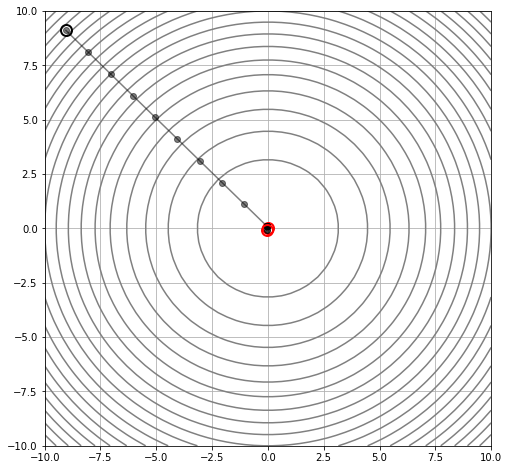

In [5]:
#
# Trayectoria del punto inicial al punto final
#
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-10, 10)] * 2, minimum=[(0, 0)])

## Genetización del método de búsqueda local (equivalente a reiniciar)

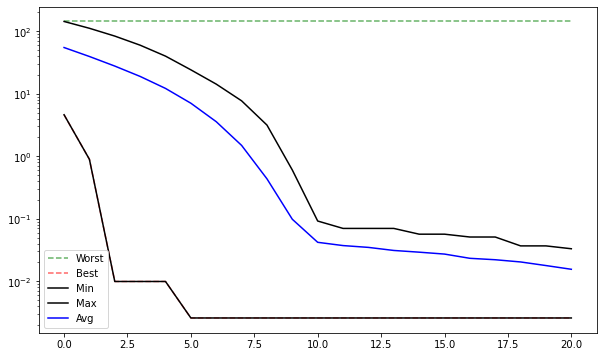

In [6]:
#
# Inicializa los operadores
#
stats = Statistics()

POPSIZE = 10
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-10, -10],
    high=[10, 10],
)

optimizer = LocalSearch(
    fn=fn,
    delta0=0.5,
    reduction_factor=0.9,
)

#
# Algoritmo
#
solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [7]:
stats.x_opt, stats.fn_opt

(array([ 0.0164738 , -0.04810411]), 0.0025853912278760937)